# Assigment 1 - In-Depth Word Vectors Analysis

##### Name: Jaimis Arvindbhai Miyani
    
##### Student ID: 400551743
    
##### MacID: miyanij@mcmaster.ca
    
##### Subject: SEP 775 - Introduction to Computational Natural Language Processing






## Task 1 - Building and Analyzing Word Vectors with Word2Vec

• Task: Create word vectors using the Word2Vec model on a selected corpus. 

• Visualization: Utilize PCA or t-SNE for visualizing these vectors in 2D.

• Analysis: Discuss the word relationships and clusters formed.

In [2]:
# imports

import gzip
import gensim 
import logging
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim.downloader as api

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
# pre-trained Word2Vec model -> word2vec-google-news-300
wv = api.load('word2vec-google-news-300') 

logging.info ("Pre-trained vectors loaded successfully") 

2024-02-07 23:41:16,378 : INFO : loading projection weights from /Users/jaimismiyani/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
2024-02-07 23:42:03,361 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /Users/jaimismiyani/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-02-07T23:42:03.357711', 'gensim': '4.3.0', 'python': '3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'load_word2vec_format'}
2024-02-07 23:42:03,377 : INFO : Pre-trained vectors loaded successfully


In [4]:
# type of pre-trained model
print(type(wv))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [5]:
# vector representaton of word -> person
wv["person"]

array([ 0.27539062, -0.24707031,  0.01721191,  0.16796875, -0.14550781,
        0.16015625,  0.16503906,  0.12158203,  0.16699219, -0.30664062,
        0.00509644, -0.12158203,  0.11816406, -0.25      ,  0.03857422,
        0.23046875, -0.1953125 ,  0.00982666, -0.11132812, -0.09912109,
       -0.03710938, -0.20019531,  0.02600098, -0.26171875, -0.05224609,
       -0.16015625, -0.19628906,  0.2421875 , -0.02441406, -0.08544922,
       -0.06494141,  0.00588989, -0.27929688,  0.10009766, -0.109375  ,
        0.17578125,  0.00921631, -0.01696777, -0.14648438,  0.17382812,
       -0.07861328, -0.04443359,  0.11181641,  0.14648438,  0.18164062,
       -0.10253906, -0.01171875, -0.0133667 , -0.08544922, -0.1171875 ,
       -0.02758789, -0.10400391,  0.08447266, -0.0088501 ,  0.15820312,
        0.02246094,  0.00561523,  0.04077148,  0.16601562, -0.04858398,
        0.12109375,  0.22363281, -0.17480469,  0.03320312,  0.09228516,
       -0.01287842, -0.02856445,  0.12890625,  0.125     , -0.01

In [6]:
# dimension of each word vector -> (300,)
print(wv['king'].shape) 

(300,)


In this model, each word has a 300-dimensional representation

#### Checking similarities 

In [7]:
# Example-1
w1 = "hotels"
wv.most_similar (positive=w1)

[('luxury_hotels', 0.7760115265846252),
 ('hotel', 0.7709729075431824),
 ('Hotels', 0.739387035369873),
 ('hotel_rooms', 0.6964089274406433),
 ('boutique_hotels', 0.6774542927742004),
 ('resorts', 0.6712137460708618),
 ('Sheratons', 0.6497679948806763),
 ('Sofitels', 0.6454330682754517),
 ('Hampton_Inns', 0.642551600933075),
 ('hoteliers', 0.638741672039032)]

In [8]:
# Example-2
w2 = "cars"
wv.most_similar (positive=w2)

[('vehicles', 0.800811231136322),
 ('car', 0.7423830032348633),
 ('automobiles', 0.7095546126365662),
 ('Cars', 0.6786174178123474),
 ('motorcycles', 0.6766677498817444),
 ('trucks', 0.6515100002288818),
 ('Porsches', 0.6339792013168335),
 ('bikes', 0.6299718022346497),
 ('BMWs', 0.6202709674835205),
 ('SUVs', 0.6192981600761414)]

In [9]:
# Example-3
w3 = "canada"
wv.most_similar (positive=w3, topn=5) # Checking for top 5 most similar word with 'canada'

[('australia', 0.7359463572502136),
 ('usa', 0.7136157155036926),
 ('canadian', 0.6989886164665222),
 ('uk', 0.6821741461753845),
 ('india', 0.6490968465805054)]

In [10]:
# Example-4
w4 = "rain"
wv.most_similar (positive=w4, topn=6) # Checking for top 6 most similar word with 'rain'

[('heavy_rain', 0.8421464562416077),
 ('downpour', 0.796761691570282),
 ('rains', 0.7827130556106567),
 ('torrential_rain', 0.7578904628753662),
 ('Rain', 0.7476006150245667),
 ('downpours', 0.7357000112533569)]

In [11]:
# Example-4
w5 = ["room", "hotel", "pool"]
w6 = ["food"]
wv.most_similar (positive=w5,negative=w6,topn=10) # Checking for top 10 most similar word with w5 but not with w6


[('rooms', 0.6288388967514038),
 ('swimming_pool', 0.5232208967208862),
 ('lounge', 0.5106581449508667),
 ('ballroom', 0.4863496720790863),
 ('motel', 0.4843842387199402),
 ('gym_sauna', 0.4793115258216858),
 ('bedroom', 0.4784949719905853),
 ('pools', 0.4740671217441559),
 ('master_bedroom', 0.47236141562461853),
 ('penthouse_suite', 0.47020620107650757)]

#### Similarity between two words 

In [12]:
# Example-1
wv.similarity(w1="car",w2="bike")

0.58541536

In [13]:
# Example-2
wv.similarity(w1="dog",w2="dog")

0.99999994

In [14]:
# Example-3
wv.similarity(w1="king",w2="queen")

0.6510957

#### Find the odd one out

In [15]:
# Example-1
wv.doesnt_match(["lion","tiger","whale","cow"])

'whale'

In [16]:
# Example-2
wv.doesnt_match(["road","car","bike","building"])

'building'

## Visualizing word vectors in 2D using PCA

In [17]:
# randomly extracted words from pre-trained model to visualize their word vectors after applying PCA technique.
words = ['man','woman','boy','girl','king','queen','prince','princess']
sample_vectors = np.array([wv[word] for word in words])
sample_vectors.shape # 8 words, 300 dimensions -> (8, 300)

(8, 300)

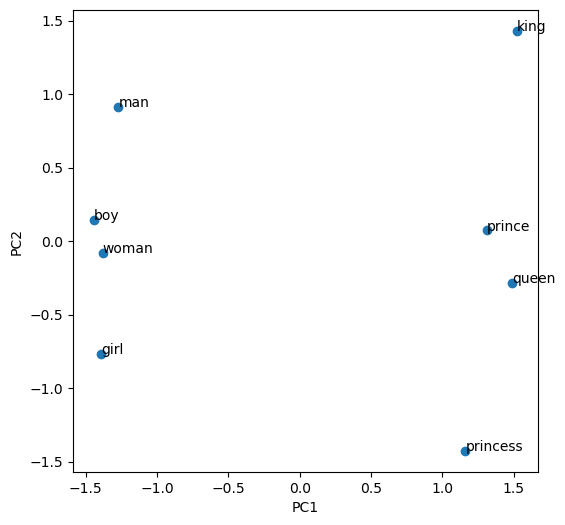

In [18]:
vectors = [wv[word] for word in words]

# reducing words vectors to 2 dimentions using PCA -> n_components = 2
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# scatter plot for reduced word vectors
plt.figure(figsize=(6,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Task 2 - GloVe Vectors Advanced Analysis

• Task: Analyze word relationships using pre-trained GloVe vectors.

• Activity: Conduct an analogy task (e.g., king - man + woman = ?) with examples. 

• Explanation: Explain the results of the analogy tasks.

In [19]:
# pre-trained GloVe model -> glove-wiki-gigaword-300
glove = api.load('glove-wiki-gigaword-300')

logging.info ("Pre-trained vectors loaded successfully") 

2024-02-07 23:43:01,357 : INFO : loading projection weights from /Users/jaimismiyani/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz
2024-02-07 23:44:08,279 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (400000, 300) matrix of type float32 from /Users/jaimismiyani/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-02-07T23:44:08.277609', 'gensim': '4.3.0', 'python': '3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'load_word2vec_format'}
2024-02-07 23:44:08,292 : INFO : Pre-trained vectors loaded successfully


In [20]:
# type of pre-trained model
print(type(glove))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [21]:
# dimension of each word vector -> (300,)
print(glove['laptop'].shape) 

(300,)


#### Checking similarities 

In [22]:
# Example-1
w1 = "song"
glove.most_similar (positive=w1, topn=5) # Checking for top 5 most similar word with 'song'

[('songs', 0.8319584727287292),
 ('album', 0.7817134857177734),
 ('lyrics', 0.6808661222457886),
 ('ballad', 0.638777494430542),
 ('singer', 0.6367929577827454)]

In [23]:
# Example-2
w2 = "snow"
glove.most_similar (positive=w2, topn=6) # Checking for top 5 most similar word with 'snow'

[('rain', 0.6109930276870728),
 ('snowfall', 0.6001911759376526),
 ('fog', 0.5474330186843872),
 ('winter', 0.530937910079956),
 ('mountain', 0.5210750699043274),
 ('sleet', 0.5163257122039795)]

#### Similarity between two words 

In [24]:
# Example-1
glove.similarity(w1="home",w2="house")

0.5005335

In [25]:
# Example-2
glove.similarity(w1="collage",w2="school")

0.13498183

#### Analogy tasks

In [26]:
# Example-1

glove.most_similar(positive=['king', 'woman'], negative=['man'], topn=1) # king - man + woman

[('queen', 0.6713277101516724)]

In [27]:
# Example-2

glove.most_similar(positive=['woman', 'husband'], negative=['man'], topn=1) # woman - husband + man

[('wife', 0.7732622027397156)]

## Visualizing word vectors in 2D using TSNE

In [28]:
# randomly extracted words from pre-trained model to visualize their word vectors after applying PCA technique.
my_words = ['apple','orange','shimla','banana','maruti','mumbai','china','india','husband'
            ,'wife','brother','sister','red','yellow','computer','mobile','pear','guava']

In [29]:
words = []
vectors = []

for word in my_words:
    words.append(word)
    vectors.append(glove[word])

# creating dictionary with words and vectors
dicts = zip(words,vectors)

# reducing words vectors to 2 dimentions using TSNE -> n_components = 2 and perplexity = 3
dim_model = TSNE(n_components=2, perplexity=3, init='pca', random_state=45)

fit_model = dim_model.fit_transform(np.array(vectors))


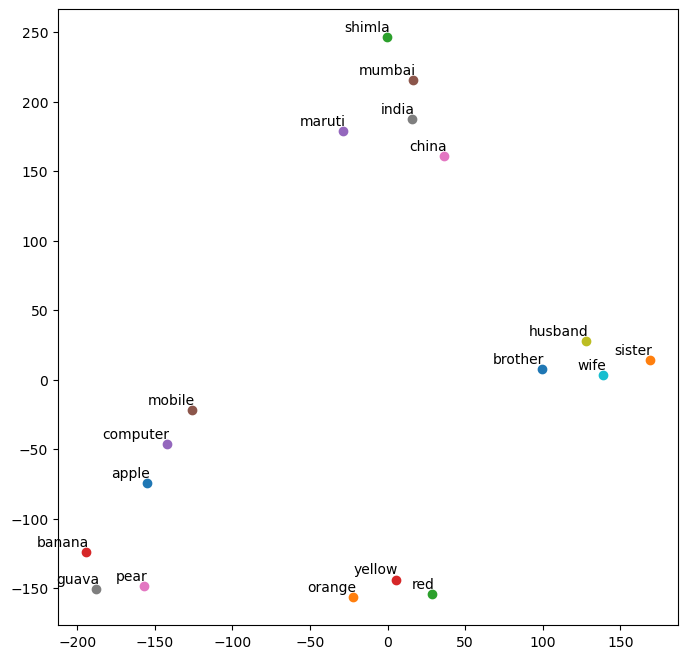

In [30]:
x, y = zip(*fit_model)

# scatter plot for reduced word vectors
plt.figure(figsize=(8, 8))
for i, word in enumerate(words):
    plt.scatter(x[i], y[i])
    plt.annotate(word, xy=(x[i], y[i]), xytext=(2, 2), textcoords='offset points', ha='right', va='bottom')

plt.show()

## Task 3 - Semantic and Syntactic Word Relationships

Comparison: Evaluate Word2Vec and GloVe for capturing semantic and syntactic relationships.

Illustration: Use specific word pairs or groups to demonstrate differences in repre- sentation by each model.

#### Semantic Word Relationships

In [31]:
# semantic word pairs
semantic_word_pairs = ["car-vehicle", "hotel-accommodation", "good-excellent", "bad-terrible", "happy-joyful"]
semantic_w2v_scores = []
semantic_glove_scores = []

In [32]:
# for each word pair calculate similarity between word using pre-trained word2vec and glove model
for pair in semantic_word_pairs:
    word1, word2 = pair.split('-')
    w2v_score = wv.similarity(word1, word2)
    glove_score = glove.similarity(word1, word2)
    semantic_w2v_scores.append(w2v_score)
    semantic_glove_scores.append(glove_score)
    

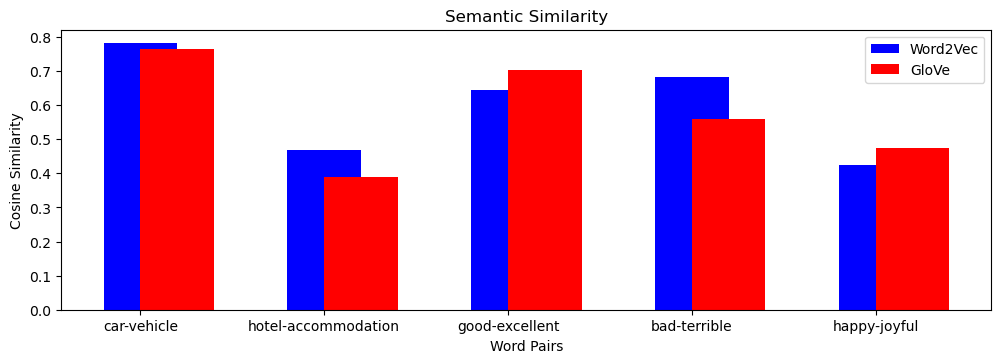

In [33]:
# create bar chart to compare similarity between word pairs using both pre-trained model 
plt.figure(figsize=(12, 8))

# Semantic similarity
plt.subplot(2, 1, 1)
plt.bar(semantic_word_pairs, semantic_w2v_scores, width=0.4, label='Word2Vec', color='b', align='center')
plt.bar(semantic_word_pairs, semantic_glove_scores, width=0.4, label='GloVe', color='r', align='edge')
plt.xlabel('Word Pairs')
plt.ylabel('Cosine Similarity')
plt.title('Semantic Similarity')
plt.legend()

#### Syntactic Word Relationships

In [34]:
# syntactic analogy tasks
analogy_tasks = ["man woman king ?", "husband woman man ?", "walk walking swim ?", "big bigger small ?", "eat ate go ?", "fast faster slow ?"]
analogy_w2v_words = []
analogy_glove_words = []

In [35]:
# perform syntactic analogy tasks for each example
for task in analogy_tasks:
    words = task.split()  # Split the task into individual words
    word1, word2, word3 = words[:-1]  # Extract the words for analogy
    w2v_result = wv.most_similar(positive=[word2, word3], negative=[word1], topn=1)
    glove_result = glove.most_similar(positive=[word2, word3], negative=[word1], topn=1)
    analogy_w2v_words.append(w2v_result[0][0])
    analogy_glove_words.append(glove_result[0][0])
    
print(f"Analogy task performed by word2vec: {analogy_w2v_words}\n\nAnalogy task performed by glove: {analogy_glove_words}")


Analogy task performed by word2vec: ['queen', 'teenage_girl', 'swimming', 'larger', 'went', 'slower']

Analogy task performed by glove: ['queen', 'girl', 'swimming', 'larger', 'went', 'slower']
